#### sklearn simple linear regression big mac index

In [ ]:
! pip install seaborn

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

C:\Users\1000259375\AppData\Local\Temp\ipykernel_5840\31818707.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
url ='https://raw.githubusercontent.com/TheEconomist/big-mac-data/master/output-data/big-mac-adjusted-index.csv'
df = pd.read_csv(url, parse_dates=['date']) # parse 'date' to datetime
df.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_bigmac,adj_price,USD,EUR,GBP,JPY,CNY
0,2000-04-01,ARG,ARS,Argentina,2.50,1.000000,2.500000,7803.328512,1.928167,0.39739,0.16547,-0.06363,0.10547,0.96883
1,2000-04-01,AUS,AUD,Australia,2.59,1.680000,1.541667,29165.768649,2.317131,-0.28293,-0.40194,-0.51950,-0.43273,0.01031
2,2000-04-01,BRA,BRL,Brazil,2.95,1.790000,1.648045,4822.738983,1.873897,-0.05214,-0.20945,-0.36485,-0.25015,0.33548
3,2000-04-01,GBR,GBP,Britain,1.90,0.632911,3.002000,20976.720505,2.168026,0.49234,0.24466,0.00000,0.18059,1.10262
4,2000-04-01,CAN,CAD,Canada,2.85,1.470000,1.938776,26087.329235,2.261079,-0.07587,-0.22924,-0.38075,-0.26892,0.30204


In [14]:
df.corr

<bound method DataFrame.corr of            date iso_a3 currency_code                  name  local_price  \
1383 2023-01-01    ARG           ARS             Argentina       980.00   
1384 2023-01-01    AUS           AUD             Australia         7.25   
1385 2023-01-01    AZE           AZN            Azerbaijan         4.90   
1386 2023-01-01    BHR           BHD               Bahrain         1.70   
1387 2023-01-01    BRA           BRL                Brazil        22.90   
1388 2023-01-01    GBR           GBP               Britain         3.79   
1389 2023-01-01    CAN           CAD                Canada         6.11   
1390 2023-01-01    CHL           CLP                 Chile      3800.00   
1391 2023-01-01    CHN           CNY                 China        24.00   
1392 2023-01-01    COL           COP              Colombia     18900.00   
1393 2023-01-01    CRI           CRC            Costa Rica      2800.00   
1394 2023-01-01    CZE           CZK        Czech Republic        99

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1489 non-null   datetime64[ns]
 1   iso_a3         1489 non-null   object        
 2   currency_code  1489 non-null   object        
 3   name           1489 non-null   object        
 4   local_price    1489 non-null   float64       
 5   dollar_ex      1489 non-null   float64       
 6   dollar_price   1489 non-null   float64       
 7   GDP_bigmac     1489 non-null   float64       
 8   adj_price      1489 non-null   float64       
 9   USD            1489 non-null   float64       
 10  EUR            1489 non-null   float64       
 11  GBP            1489 non-null   float64       
 12  JPY            1489 non-null   float64       
 13  CNY            1489 non-null   float64       
dtypes: datetime64[ns](1), float64(10), object(3)
memory usage: 163.0+ KB


In [5]:
df=df[(df['date'].dt.year==2023) & (df['date'].dt.month==1)]
df.head

<bound method NDFrame.head of            date iso_a3 currency_code                  name  local_price  \
1383 2023-01-01    ARG           ARS             Argentina       980.00   
1384 2023-01-01    AUS           AUD             Australia         7.25   
1385 2023-01-01    AZE           AZN            Azerbaijan         4.90   
1386 2023-01-01    BHR           BHD               Bahrain         1.70   
1387 2023-01-01    BRA           BRL                Brazil        22.90   
1388 2023-01-01    GBR           GBP               Britain         3.79   
1389 2023-01-01    CAN           CAD                Canada         6.11   
1390 2023-01-01    CHL           CLP                 Chile      3800.00   
1391 2023-01-01    CHN           CNY                 China        24.00   
1392 2023-01-01    COL           COP              Colombia     18900.00   
1393 2023-01-01    CRI           CRC            Costa Rica      2800.00   
1394 2023-01-01    CZE           CZK        Czech Republic        99.0

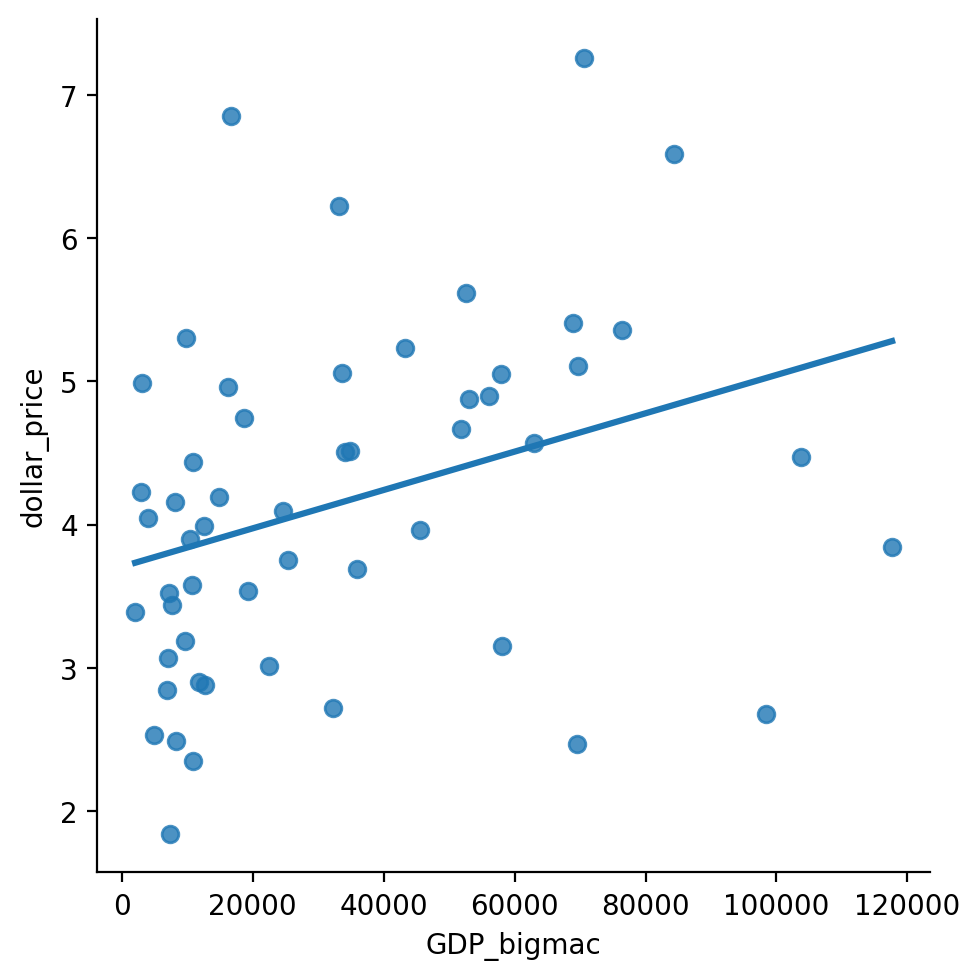

In [7]:
sns.lmplot(x='GDP_bigmac', y='dollar_price', data=df, ci=None)

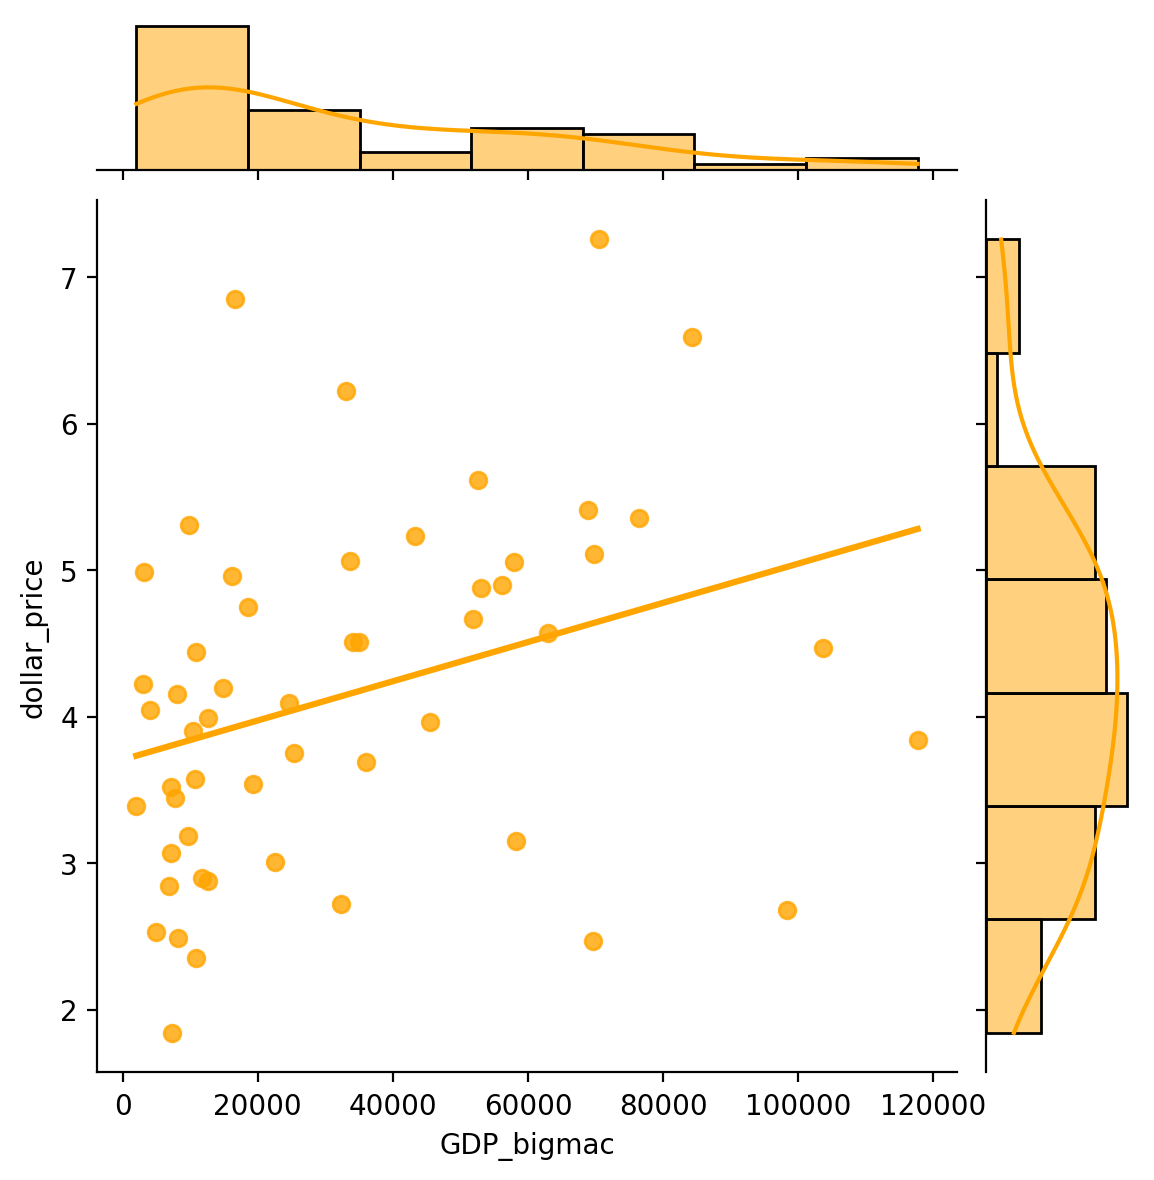

In [8]:
sns.jointplot(x='GDP_bigmac', y='dollar_price', data=df, kind='reg', ci=None, color='orange')

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()
model

LinearRegression()

In [11]:
X=df[['GDP_bigmac']] # expect 2D array
y=df.dollar_price

In [12]:
model.fit(X, y)

LinearRegression()

In [13]:
model.score(X, y) # R-squared

0.10922188468699912

In [15]:
model.intercept_

3.7069849378526145

In [16]:
model.coef_

array([1.33848048e-05])

#### predictions y = ax + b

In [17]:
model.intercept_ + model.coef_ * 9000

array([3.82744818])

In [18]:
model.predict([[9000]]) # if GDP = 9000, bigmac should be price...

c:\Users\1000259375\Desktop\DE Project\PythonMLBasic\env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.82744818])

In [19]:
model.predict([[9000],
                [40000]]) # if GDP are 9000 and 40000

c:\Users\1000259375\Desktop\DE Project\PythonMLBasic\env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.82744818, 4.24237713])

In [21]:
np.arange(5000,50001,2500) # create 1D array from 5000 to 50000 step up 2500 each

array([ 5000,  7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000,
       27500, 30000, 32500, 35000, 37500, 40000, 42500, 45000, 47500,
       50000])

In [22]:
np.arange(5000,50001,2500).reshape(-1,1) # turn to 2D array

array([[ 5000],
       [ 7500],
       [10000],
       [12500],
       [15000],
       [17500],
       [20000],
       [22500],
       [25000],
       [27500],
       [30000],
       [32500],
       [35000],
       [37500],
       [40000],
       [42500],
       [45000],
       [47500],
       [50000]])

In [23]:
model.predict(np.arange(5000,50001,2500).reshape(-1,1))

c:\Users\1000259375\Desktop\DE Project\PythonMLBasic\env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.77390896, 3.80737097, 3.84083299, 3.874295  , 3.90775701,
       3.94121902, 3.97468103, 4.00814305, 4.04160506, 4.07506707,
       4.10852908, 4.14199109, 4.17545311, 4.20891512, 4.24237713,
       4.27583914, 4.30930115, 4.34276317, 4.37622518])

In [24]:
np.linspace(5000,50000,20) # create 1D array from 5000 to 50000 totally 20 members with equal space

array([ 5000.        ,  7368.42105263,  9736.84210526, 12105.26315789,
       14473.68421053, 16842.10526316, 19210.52631579, 21578.94736842,
       23947.36842105, 26315.78947368, 28684.21052632, 31052.63157895,
       33421.05263158, 35789.47368421, 38157.89473684, 40526.31578947,
       42894.73684211, 45263.15789474, 47631.57894737, 50000.        ])

In [25]:
np.linspace(5000,50000,20).reshape(-1,1)

array([[ 5000.        ],
       [ 7368.42105263],
       [ 9736.84210526],
       [12105.26315789],
       [14473.68421053],
       [16842.10526316],
       [19210.52631579],
       [21578.94736842],
       [23947.36842105],
       [26315.78947368],
       [28684.21052632],
       [31052.63157895],
       [33421.05263158],
       [35789.47368421],
       [38157.89473684],
       [40526.31578947],
       [42894.73684211],
       [45263.15789474],
       [47631.57894737],
       [50000.        ]])

In [27]:
s=pd.Series(np.linspace(5000,50000,20)) # series (1 col)
s

0      5000.000000
1      7368.421053
2      9736.842105
3     12105.263158
4     14473.684211
5     16842.105263
6     19210.526316
7     21578.947368
8     23947.368421
9     26315.789474
10    28684.210526
11    31052.631579
12    33421.052632
13    35789.473684
14    38157.894737
15    40526.315789
16    42894.736842
17    45263.157895
18    47631.578947
19    50000.000000
dtype: float64

In [28]:
model.predict(s.to_frame()) # turn series to df

c:\Users\1000259375\Desktop\DE Project\PythonMLBasic\env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.77390896, 3.80560982, 3.83731067, 3.86901152, 3.90071238,
       3.93241323, 3.96411408, 3.99581494, 4.02751579, 4.05921664,
       4.0909175 , 4.12261835, 4.1543192 , 4.18602006, 4.21772091,
       4.24942176, 4.28112262, 4.31282347, 4.34452432, 4.37622518])

In [32]:
dx = pd.DataFrame(np.linspace(5000,50000,20), columns=['GDP_bigmac'])
dx

,GDP_bigmac
0,5000.000000
1,7368.421053
2,9736.842105
3,12105.263158
4,14473.684211
5,16842.105263
6,19210.526316
7,21578.947368
8,23947.368421
9,26315.789474


In [33]:
model.predict(dx)

array([3.77390896, 3.80560982, 3.83731067, 3.86901152, 3.90071238,
       3.93241323, 3.96411408, 3.99581494, 4.02751579, 4.05921664,
       4.0909175 , 4.12261835, 4.1543192 , 4.18602006, 4.21772091,
       4.24942176, 4.28112262, 4.31282347, 4.34452432, 4.37622518])

#### Statsmodels: Simple Linear Regression

In [35]:
! pip install statsmodels

     ---------------------------------------- 9.8/9.8 MB 1.4 MB/s eta 0:00:00
     -------------------------------------- 233.9/233.9 KB 1.3 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\1000259375\Desktop\DE Project\PythonMLBasic\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [36]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [37]:
# formula: reponse - predictor + predictor
model_a = smf.ols(formula='dollar_price ~ GDP_bigmac', data=df).fit()

In [39]:
model_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           dollar_price   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     6.253
Date:                Sun, 04 Feb 2024   Prob (F-statistic):             0.0157
Time:                        13:54:05   Log-Likelihood:                -81.049
No. Observations:                  53   AIC:                             166.1
Df Residuals:                      51   BIC:                             170.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7070      0.238     15.602      0.000       3.230       4.184
GDP_bigmac  1.338e-05   5.35e-06      2.501      0.016    2.64e-06    2.41e-05
==============================================================================
Omnibus:                        0.866   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.648   Jarque-Bera (JB):                0.491
Skew:                           0.233   Prob(JB):                        0.782
Kurtosis:                       3.076   Cond. No.                     6.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
model_a.pvalues

Intercept     4.678940e-21
GDP_bigmac    1.565097e-02
dtype: float64

In [41]:
model.intercept_ #sklearn

3.7069849378526145

In [42]:
model.coef_

array([1.33848048e-05])

In [43]:
print(f'{model.coef_[0]:.7f}')

0.0000134
